In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/tmp/ipykernel_20629/236296196.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [47]:
df_raw = pd.read_csv('train.tsv', sep='\t')
df = df_raw.copy()
df.shape

(7395, 27)

In [4]:
df.sample(3).T

,5925,1923,7069
url,http://socialhype.com/tech-talk/ten-interestin...,http://www.womansday.com/recipefinder/red-velv...,http://www.diet-blog.com/12/10-lunches-under-4...
urlid,5801,1743,2000
boilerplate,"{""title"":""Top 10 Web 2 0 Startups Taking Over ...","{""title"":""Red Velvet Cupcakes Woman s Day red ...","{""url"":""diet blog 12 10 lunches under 400 calo..."
alchemy_category,?,science_technology,recreation
alchemy_category_score,?,0.209201,0.217655
avglinksize,1.269663,2.821918,2.454545
commonlinkratio_1,0.191011,0.762082,0.45679
commonlinkratio_2,0.044944,0.371747,0.185185
commonlinkratio_3,0.0,0.133829,0.074074
commonlinkratio_4,0.0,0.011152,0.037037


In [5]:
df.label.head(3)

0    0
1    1
2    1
Name: label, dtype: int64

*check the balance data*

In [6]:
df.label.mean()

0.5133198106828939

<Axes: ylabel='alchemy_category'>

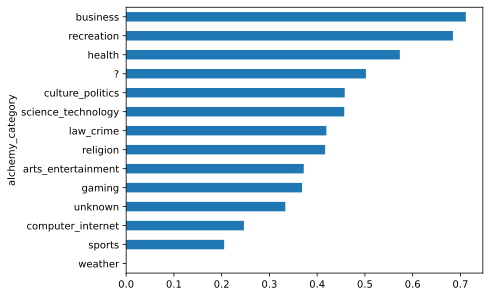

In [7]:
df.groupby('alchemy_category').label.mean().sort_values().plot.barh()

In [8]:
df.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


*Befor delating framebased column*

<Axes: >

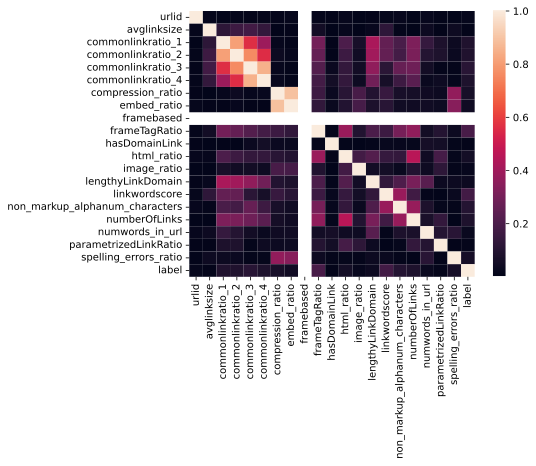

In [11]:
df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df.corr().abs())

*After deleting frambased*

In [87]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix.head(3)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,-0.002046,0.018974,-0.003002,-0.064014,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,0.006790,-0.201501,-0.064435,0.082044,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,0.000263,-0.159702,-0.044663,0.076389,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488


<Axes: >

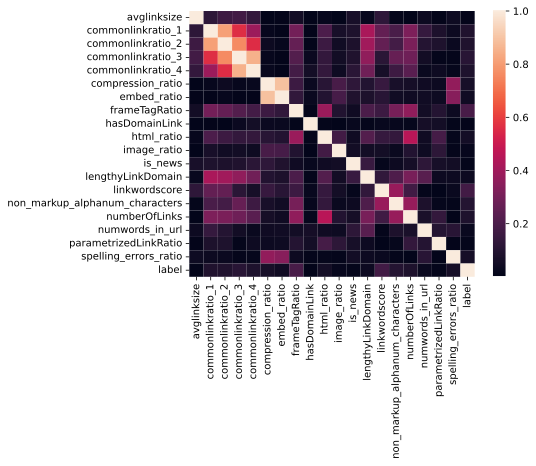

In [88]:
# framebased is correlated with all variable !! so we should to removed 
sns.heatmap(correlation_matrix.abs())

<Axes: >

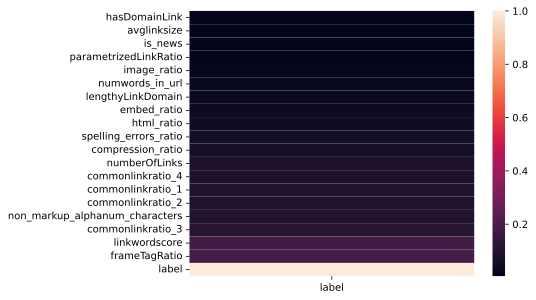

In [89]:
# we intersting to the label 'target' so we gonna see all the variable correlation with label 
sns.heatmap(correlation_matrix.abs()[['label']].sort_values('label'))

<Axes: xlabel='label', ylabel='linkwordscore'>

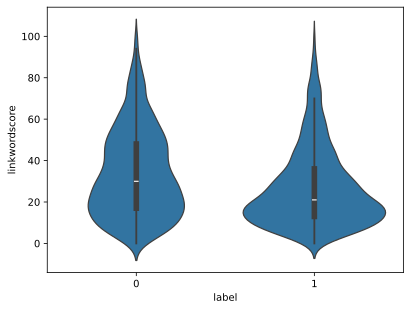

In [90]:
# we notice that the variable frameTagRtio or linkwordscore is correlated with label 
# so we gonna use violinplot to analyse it 
# we see the the data is more distrubited on 0 label for linkwordscore 
sns.violinplot(x='label', y='linkwordscore', data=df)

*Select a numerical data*

In [12]:
features_df = df.drop('label', axis=1)
num_features = features_df.select_dtypes(np.number)
num_features.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


<Axes: ylabel='Frequency'>

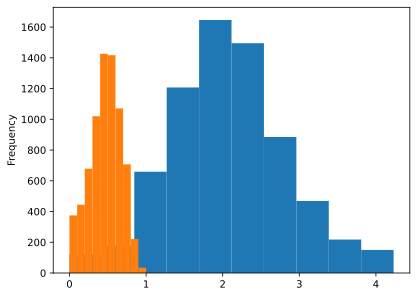

In [14]:
values = num_features.avglinksize
values_1 = values[ values < values.quantile(.95)]
values_2 = num_features.commonlinkratio_1
values_1.plot.hist()
values_2.plot.hist()

*en va normaliser ces donnees*

<Axes: ylabel='Frequency'>

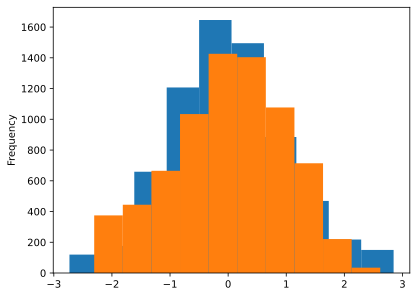

In [15]:
values_1 = (values_1 - values_1.mean() ) / values_1.std()
values_2 = (values_2 - values_2.mean() ) / values_2.std()
values_1.plot.hist()
values_2.plot.hist()

*Select categorical data*

In [19]:
# on a supprimer 'alchemy_category_score' car il est non informatif
cat_features = df.select_dtypes(include=[np.object_])
cat_features.sample(3).frame()

""
4348
2948
173


In [98]:
# select two variable alchemy_category and news_front_page
cat_features = cat_features[['alchemy_category', 'news_front_page']]
cat_features.sample(3)

,alchemy_category,news_front_page
1306,science_technology,0
1863,arts_entertainment,0
2218,?,0


Using : One Hot encoding*

In [125]:
# convert a categoral data to numerical 
trans_features = pd.get_dummies(cat_features).astype(int)
trans_features.shape

(7395, 17)

*Modeling*

In [131]:
# fusioner les de feature categorical et numerical
features_df = pd.concat([num_features, trans_features], axis=1)
features_df.sample(2)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
4307,2.757576,0.368421,0.315789,0.263158,0.157895,0.445255,0.0,0.071146,0,0.266154,...,0,0,0,0,0,0,0,1,0,0
4917,2.374150,0.533742,0.282209,0.134969,0.061350,0.485123,0.0,0.049931,0,0.249449,...,0,0,0,0,0,0,0,1,0,0


*Befor trainning the model we should normalize thz data*

In [24]:
target = df['label']
target.shape

(7395,)

In [56]:
# randome forest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

features_df = df.drop('label', axis=1)
features_colums = features_df.columns
num_features = features_df.select_dtypes(include=[np.number]).columns
cat_features = ['alchemy_category', 'news_front_page']

numeric_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
     ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tranformer, num_features),
        ('cat', categorical_transformer, cat_features),
    ])


In [57]:
features_df= preprocessor.fit_transform(df)
features_df.shape

(7395, 37)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25, random_state=49)
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       918
           1       0.71      0.71      0.71       931

    accuracy                           0.71      1849
   macro avg       0.71      0.71      0.71      1849
weighted avg       0.71      0.71      0.71      1849



In [61]:
# modeling using dummy
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(x_train, y_train)
baseline_pred = baseline.predict(x_test)
print(classification_report(baseline_pred, y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      1849

    accuracy                           0.50      1849
   macro avg       0.50      0.25      0.33      1849
weighted avg       1.00      0.50      0.67      1849



In [79]:
# logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
imputer = SimpleImputer(strategy='mean')
features_df = imputer.fit_transform(features_df)
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25)
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5546, 37) (1849, 37) (5546,) (1849,)


In [80]:
baseline = DummyClassifier(strategy='most_frequent') 
model = LogisticRegressionCV()

In [81]:
# train the model
baseline.fit(x_train_scaler, y_train)
model.fit(x_train_scaler, y_train)

LogisticRegressionCV()

In [84]:
y_prediction=  model.predict(x_test_scaler)
print(y_train.mean())
print(classification_report(y_test, y_prediction))

0.5075730256040389
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       868
           1       0.69      0.70      0.70       981

    accuracy                           0.67      1849
   macro avg       0.67      0.67      0.67      1849
weighted avg       0.67      0.67      0.67      1849



In [87]:
# Dummy
baseline_prediction = baseline.predict(x_test_scaler)
print(classification_report(y_test, baseline_prediction, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       868
           1       0.53      1.00      0.69       981

    accuracy                           0.53      1849
   macro avg       0.27      0.50      0.35      1849
weighted avg       0.28      0.53      0.37      1849

